In [33]:
%matplotlib inline
import pandas_profiling
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 4]
import pandas
pandas.options.display.max_columns = 999
from datetime import datetime

In [2]:
now = pandas.Timestamp(datetime.now())

In [3]:
df = pandas.read_csv("../results.csv", parse_dates=[0,10])

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,103.6 KiB
Average record size in memory,106.1 B
Numeric,13
Categorical,4
Date,2
Text (Unique),1
Rejected,9
Distinct count,2


In [6]:
df.dtypes


last_updated          datetime64[ns]
github_link                   object
user                          object
project_name                  object
app_id                        object
category                      object
stars                          int64
contributors                   int64
commits                        int64
forks                          int64
created_at            datetime64[ns]
androidviewclient               bool
appium                          bool
calabash                        bool
espresso                        bool
monkeyrunner                    bool
pythonuiautomator               bool
robotium                        bool
uiautomator                     bool
projectquantum                  bool
qmetry                          bool
saucelabs                       bool
firebase                        bool
perfecto                        bool
bitbar                          bool
junit                           bool
androidjunitrunner              bool
r

In [10]:
ui_automation_frameworks = [
    "androidviewclient",
    'appium',
    'calabash',
    'espresso',
    'monkeyrunner',
    'pythonuiautomator',
    'robotium',
    'uiautomator',
]

cloud_test_services = [
    'projectquantum',
    'qmetry',
    'saucelabs',
    'firebase',
    'perfecto',
    'bitbar',
]

unit_test_frameworks = [
    'junit',
    'androidjunitrunner',
    'roboelectric',
    'robospock',
]

# Projects with tests

In [29]:
projects_with_tests = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].apply(any, axis=1).sum()
total_projects = len(df.index)
print("{} out of {} projects ({:.0%}).".format(projects_with_tests, total_projects, projects_with_tests/total_projects))

406 out of 1000 projects (41%).


# Projects with unit tests

In [30]:
projects_with_unit_tests = df[unit_test_frameworks].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_unit_tests, total_projects, projects_with_tests/total_projects))

392 out of 1000 projects (39%).


# Projects using UI tests

In [31]:
projects_with_ui_tests = df[ui_automation_frameworks].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_ui_tests, total_projects, projects_with_tests/total_projects))


154 out of 1000 projects (39%).


# Projects using cloud test services

In [28]:
projects_with_cloud_tests = df[cloud_test_services].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_cloud_tests, total_projects, projects_with_tests/total_projects))


29 out of 1000 projects (41%).


# Number of projects by framework

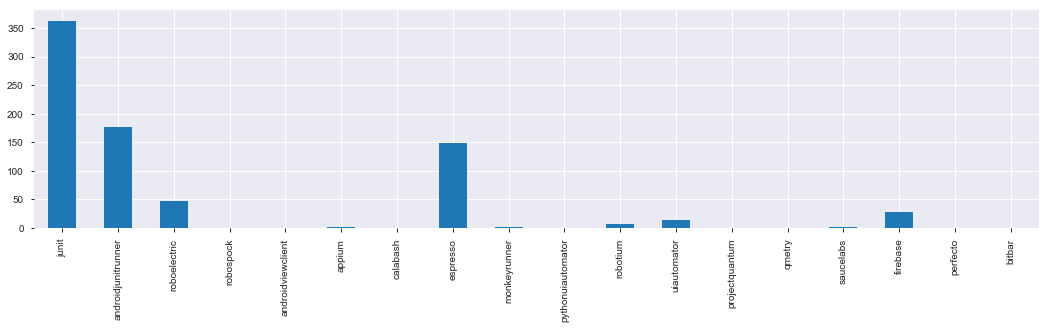

In [38]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# pie = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='pie', ax=ax1)
bar = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='bar')

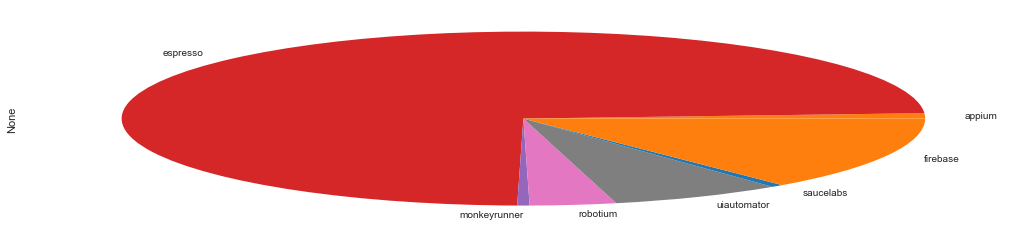

In [39]:
pie = df[ui_automation_frameworks+cloud_test_services].sum().plot(kind='pie')


In [40]:
df['age'] = (now - df['created_at'])
df['age_numeric'] = (now - df['created_at']).astype('<m8[Y]')
df['time_since_last_update'] = (now - df['last_updated'])

# Distribution of Age

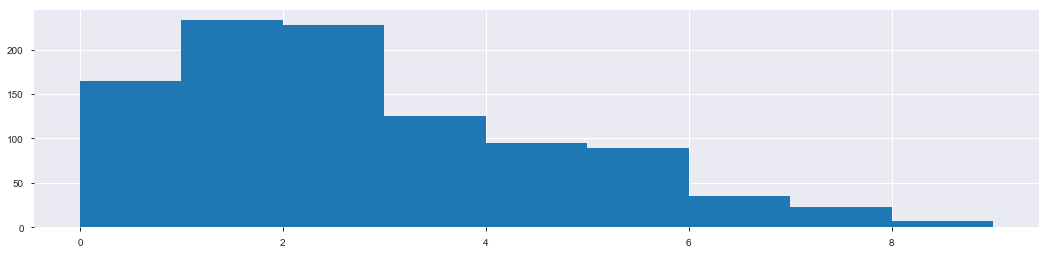

In [41]:
df['age_numeric'].hist(bins=9)

In [42]:
df['age'].describe()

count                         1000
mean     1028 days 11:37:03.972600
std       673 days 11:56:35.891598
min        27 days 11:18:20.772600
25%       524 days 05:18:20.772600
50%       897 days 11:18:20.772600
75%      1451 days 11:18:20.772600
max      3328 days 11:18:20.772600
Name: age, dtype: object

# Tests in projects by time since creation

In [73]:
def tests_in_projects_by_time_of_creation(df_projects, frameworks, label=None,
                                          title="Portion of projects with tests by age",
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    for age in range(9):
        n_projects_with_tests = df_projects[df_projects['age_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['age_numeric']==age].index)
        total_projects_history.append(total_projects)
        portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(9), portions, label=label)
    plt.scatter(range(9), portions, total_projects_history, marker='o', linewidth='1')
    ax = plt.gca()
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        plt.title(title)

Age 0:
107 out of 165 projects (64.8%).
Age 1:
136 out of 233 projects (58.4%).
Age 2:
56 out of 228 projects (24.6%).
Age 3:
34 out of 125 projects (27.2%).
Age 4:
28 out of 95 projects (29.5%).
Age 5:
30 out of 89 projects (33.7%).
Age 6:
10 out of 35 projects (28.6%).
Age 7:
4 out of 23 projects (17.4%).
Age 8:
1 out of 6 projects (16.7%).


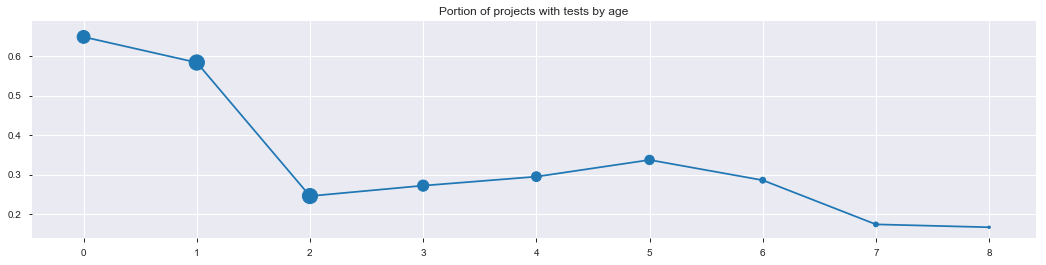

In [74]:
tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services,
                                      verbose=True)

In [46]:
((df['age'].dt.total_seconds()/3600/24/365)<1).sum()

165

# Tests in projects by time since creation (only for active projects)

Only considered projects that had an update in the last year.

Total projects updated within last year: 677.


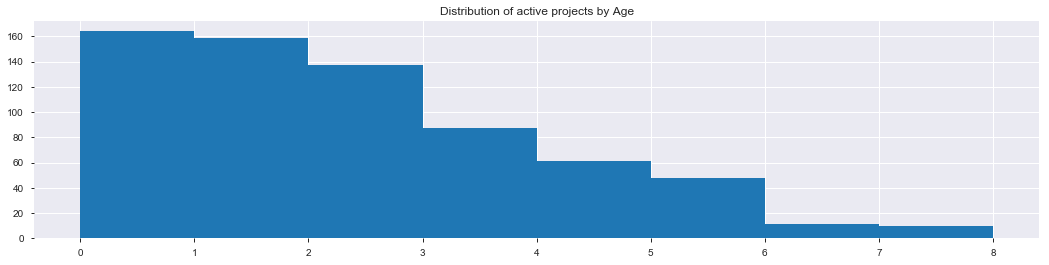

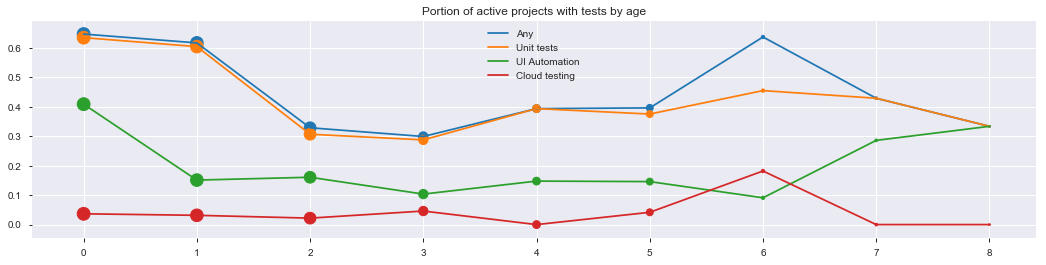

In [85]:
df_active = df[df['time_since_last_update'].dt.total_seconds()/(3600*24*365) < 1]
print("Total projects updated within last year: {}.".format(len(df_active.index)))




plt.title("Distribution of active projects by Age")
df_active.age_numeric.hist(bins=8)
# fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.figure()
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_creation(df_active, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_creation(df_active, cloud_test_services, label="Cloud testing")
plt.title("Portion of active projects with tests by age")

# Projects that use cloud testing services

In [76]:
df_cloud = df[df[cloud_test_services].any(axis='columns')]

In [77]:
print("Total projects using cloud services: {}".format(len(df_cloud)))

Total projects using cloud services: 29


### Projects that use cloud services but no other test framework: 

In [84]:
df_cloud_wo_ui = df_cloud[ui_automation_frameworks+unit_test_frameworks].any(axis=1)==False
print("Total Projects: {}".format(df_cloud_wo_ui.sum()))
df_cloud[df_cloud_wo_ui]

Total Projects: 8


,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,age,age_numeric,time_since_last_update
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2425 days 11:18:20.772600,6.0,21 days 11:18:20.772600
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,628 days 11:18:20.772600,1.0,22 days 11:18:20.772600
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1307 days 11:18:20.772600,3.0,53 days 11:18:20.772600
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1081 days 11:18:20.772600,2.0,58 days 11:18:20.772600
573,2016-11-21,https://github.com/khertan/ForRunners,khertan,ForRunners,net.khertan.forrunners,Sports & Health,38,5,182,19,2015-10-10,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,696 days 11:18:20.772600,1.0,288 days 11:18:20.772600
644,2016-10-04,https://github.com/ybonnel/TransportsRennes,ybonnel,TransportsRennes,fr.ybo.transportsbordeaux,Navigation,42,3,1291,15,2010-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2454 days 11:18:20.772600,6.0,336 days 11:18:20.772600
698,2016-08-06,https://github.com/M66B/NetGuard,M66B,NetGuard,eu.faircode.netguard,Security,1149,25,3012,271,2015-10-24,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,682 days 11:18:20.772600,1.0,395 days 11:18:20.772600
718,2016-07-08,https://github.com/Andre1299/TUI-ConsoleLauncher,Andre1299,TUI-ConsoleLauncher,ohi.andre.consolelauncher,System,209,2,123,63,2016-05-11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,482 days 11:18:20.772600,1.0,424 days 11:18:20.772600
